interactive(children=(Dropdown(description='Yksikkö:', options=('AIKTEHOHO', 'EALAPSAIK', 'ENSIHOITO'), value=…

interactive(children=(Dropdown(description='Yksikkö:', options=('AIKTEHOHO', 'EALAPSAIK', 'ENSIHOITO'), value=…


### Kansalliset keskiarvot
Alla on kansalliset keskiarvot niille kysymyksille, jotka löytyvät kansallisesta datasta vuonna 2023. Tämä toimii vertailukohtana yksikköjen tuloksille.


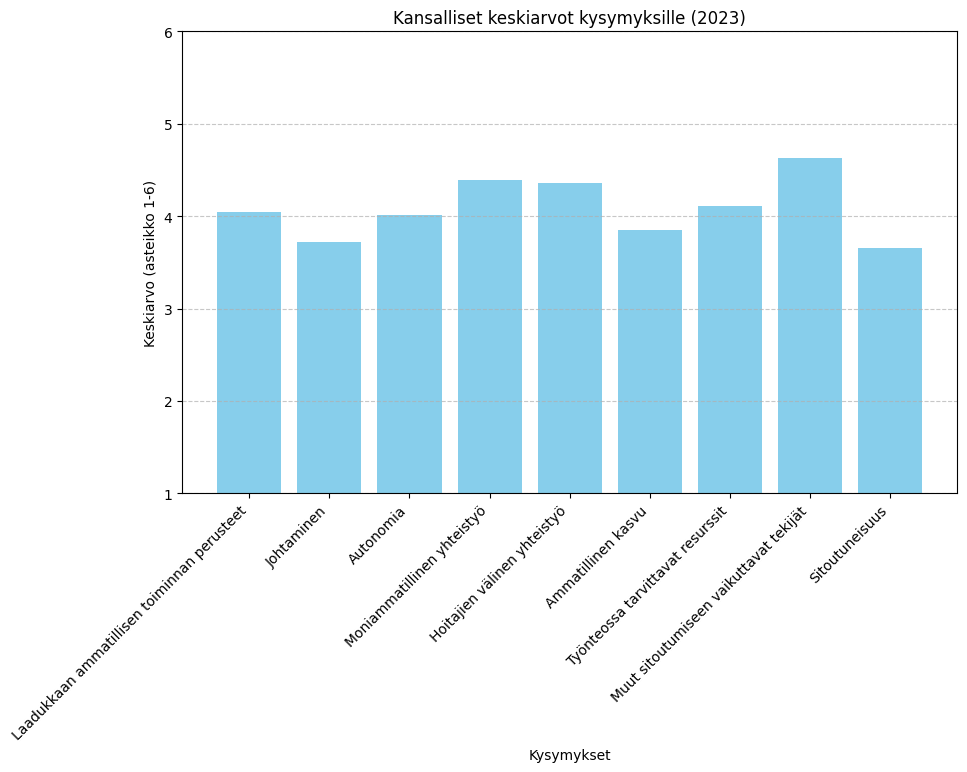

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Markdown

# Määritä tiedostopolut
file_path_2024 = r'C:\Users\vivve\code\2025\projekti-2\villemorsari\project_sigma\data\NES\NESplus_2024_Kainuu_Raakadata.xlsx'
file_path_2023 = r'C:\Users\vivve\code\2025\projekti-2\villemorsari\project_sigma\data\NES\Kopio_117_NESplus_2023.xlsx'
file_path_kansallinen = r'C:\Users\vivve\code\2025\projekti-2\villemorsari\project_sigma\data\NES\NESplus_Yksikkötyyppikohtaiset_summamuuttujien_kansalliset_keskiarvot_2023.xlsx'


# Lataa data tiedostoista
data_2024 = pd.read_excel(file_path_2024, sheet_name='Data')
data_2023 = pd.read_excel(file_path_2023, sheet_name='Matriisi')
kansallinen_data = pd.read_excel(file_path_kansallinen)

# Valitut yksiköt ja kysymykset
yksikot = ['AIKTEHOHO', 'EALAPSAIK', 'ENSIHOITO']
kysymykset = [
    'Org_johto_arvojen_muk', 'Lähiesimies_avoin_ehdotuksille',
    'Lähiesimies_hlökunnan_puolestapuhuja', 'Jyh_edustaa_ht_näkyvästi',
    'Org_huomioi_hoitajien_ehd', 'Kiitosta_työstä',
    'Uskon_org_päämääriin', 'Org_innostaa', 'Suosittelen_org',
    'Ylpeä_ammatistani', 'Työskentelen_3v_todnäk',
    'Tietoa_org_suu_ja_tav', 'Säännöllinen_palaute',
    'Vaikutan_pothoidon_suu_ja_tot', 'Sopivasti_itsenäinen'
]

# Suodata dataa valituille yksiköille
yksikko_data_2024 = data_2024[data_2024['Työyksikkö'].isin(yksikot)]
yksikko_data_2023 = data_2023[data_2023['Työyksikkö'].isin(yksikot)]

# Viivakaavio-funktio yksikön ja kysymyksen keskiarvojen vertailuun
def visualisoi_keskiarvojen_vertailu(yksikko, kysymys):
    mean_2023 = yksikko_data_2023[yksikko_data_2023['Työyksikkö'] == yksikko][kysymys].mean()
    mean_2024 = yksikko_data_2024[yksikko_data_2024['Työyksikkö'] == yksikko][kysymys].mean()

    plt.figure(figsize=(10, 6))
    plt.plot([2023, 2024], [mean_2023, mean_2024], marker='o', linestyle='-', color='blue', label=yksikko)

    plt.xticks([2023, 2024])
    plt.xlabel('Vuosi')
    plt.ylabel('Keskiarvo (asteikko 1-6)')
    plt.title(f'Yksikön {yksikko} keskiarvojen vertailu kysymykselle "{kysymys}"')
    plt.ylim(1, 6)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# Radar-kaavio-funktio yksikön keskiarvojen vertailuun kaikille kysymyksille
def visualisoi_radar_kaavio(yksikko):
    mean_2023 = yksikko_data_2023[yksikko_data_2023['Työyksikkö'] == yksikko][kysymykset].mean()
    mean_2024 = yksikko_data_2024[yksikko_data_2024['Työyksikkö'] == yksikko][kysymykset].mean()

    labels = kysymykset
    values_2023 = mean_2023.values.flatten().tolist()
    values_2024 = mean_2024.values.flatten().tolist()

    values_2023 += values_2023[:1]
    values_2024 += values_2024[:1]
    num_vars = len(labels)

    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], labels, size=10)

    ax.plot(angles, values_2023, linestyle='--', label='Vuosi 2023')
    ax.fill(angles, values_2023, alpha=0.2)

    ax.plot(angles, values_2024, linestyle='-', label='Vuosi 2024')
    ax.fill(angles, values_2024, alpha=0.4)

    plt.title(f"Radar-kaavio: Keskiarvot työyksikölle {yksikko}")
    plt.legend(loc='upper right')
    plt.show()

# Viivakaavio kansallisille keskiarvoille
def visualisoi_kansalliset_keskiarvot():
    # Käytetään kansallisen datan omia kysymyksiä
    kansalliset_kysymykset = [
        'Laadukkaan ammatillisen toiminnan perusteet', 'Johtaminen', 'Autonomia',
        'Moniammatillinen yhteistyö', 'Hoitajien välinen yhteistyö',
        'Ammatillinen kasvu', 'Työnteossa tarvittavat resurssit',
        'Muut sitoutumiseen vaikuttavat tekijät', 'Sitoutuneisuus'
    ]

    # Tarkistetaan, löytyvätkö kaikki tarvittavat sarakkeet kansallisesta datasta
    kysymykset_kansallinen = [col for col in kansalliset_kysymykset if col in kansallinen_data.columns]

    if len(kysymykset_kansallinen) > 0:
        kansallinen_data_cleaned = kansallinen_data[kysymykset_kansallinen].copy()
        for col in kansallinen_data_cleaned.columns:
            kansallinen_data_cleaned[col] = pd.to_numeric(kansallinen_data_cleaned[col], errors='coerce')
        kansallinen_keskiarvo = kansallinen_data_cleaned.mean()

        plt.figure(figsize=(10, 6))
        plt.bar(kansallinen_keskiarvo.index, kansallinen_keskiarvo.values, color='skyblue')

        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Kysymykset')
        plt.ylabel('Keskiarvo (asteikko 1-6)')
        plt.title('Kansalliset keskiarvot kysymyksille (2023)')
        plt.ylim(1, 6)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        display(Markdown("**Ei yhteensopivia kysymyksiä kansalliseen dataan.**"))

# Interaktiiviset komponentit
yksikko_valitsin = widgets.Dropdown(options=yksikot, description='Yksikkö:')
kysymys_valitsin = widgets.Dropdown(options=kysymykset, description='Kysymys:')

# Interaktiiviset funktiot
widgets.interact(visualisoi_keskiarvojen_vertailu, yksikko=yksikko_valitsin, kysymys=kysymys_valitsin)
widgets.interact(visualisoi_radar_kaavio, yksikko=yksikko_valitsin)

# Näytetään kansalliset keskiarvot erillisessä kuvaajassa
display(Markdown("""
### Kansalliset keskiarvot
Alla on kansalliset keskiarvot niille kysymyksille, jotka löytyvät kansallisesta datasta vuonna 2023. Tämä toimii vertailukohtana yksikköjen tuloksille.
"""))
visualisoi_kansalliset_keskiarvot()
